AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd
from io import StringIO

# Load the dataset
file_path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 
titanic_df = pd.read_csv(file_path)

# Display the first 10 rows
first_10_rows = titanic_df.head(10)

# Display the last 20 rows
last_20_rows = titanic_df.tail(20)

# Capture dataset info using a buffer
buffer = StringIO()
titanic_df.info(buf=buffer)
dataset_info = buffer.getvalue()

# Describe the dataset
dataset_description = titanic_df.describe()

# Combine all information into a structured output
print("First 10 rows of the dataset:\n", first_10_rows, "\n")
print("Last 20 rows of the dataset:\n", last_20_rows, "\n")
print("Dataset Info:\n", dataset_info, "\n")
print("Dataset Description:\n", dataset_description)


First 10 rows of the dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCa

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


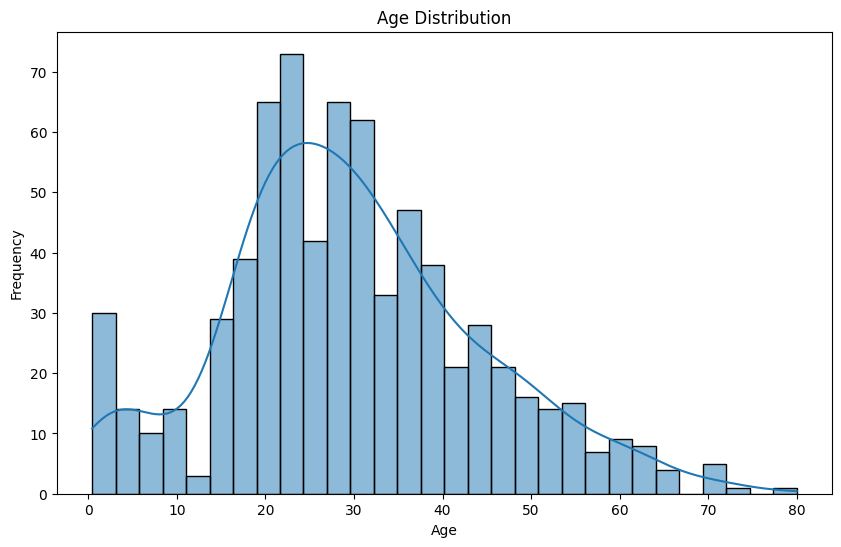

Mean Age: 29.69911764705882, Median Age: 28.0


C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3279936355.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3279936355.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

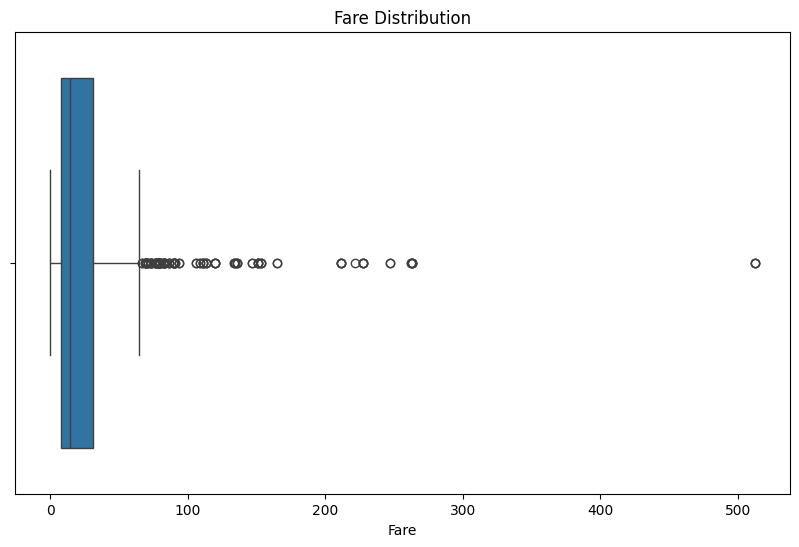


Final dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 2. Handling missing values in the 'Age' column
# 2.1. Plotting the 'Age' column to study its distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2. Calculating central tendency
# The plot helps to see that Age is normally distributed, so we can use the mean or median
mean_age = df['Age'].mean()
median_age = df['Age'].median()
print(f"Mean Age: {mean_age}, Median Age: {median_age}")

# 2.3. Filling missing values in the 'Age' column
df['Age'].fillna(median_age, inplace=True)

# 3. Handling missing values in the 'Cabin' column
# Cabin has many missing values, consider filling with 'U' for 'Unknown'
df['Cabin'].fillna('U', inplace=True)

# 4. Handling missing values in the 'Embarked' column
# Embarked has few missing values, we can fill it with the most common port
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# 5. Handling incorrect data in the 'Survived' column
# Ensure 'Survived' is binary (0 or 1)
df['Survived'] = df['Survived'].astype(int)

# 6. Handling incorrectly formatted data in the 'Fare' column
# Checking for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

# Assuming we replace outliers with the median fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
df['Fare'] = df['Fare'].apply(lambda x: median_age if x < lower_bound or x > upper_bound else x)

# Final dataset information after cleaning
print("\nFinal dataset information:")
print(df.info())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average Fare by Pclass:
    Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3066491812.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass, palette='viridis')


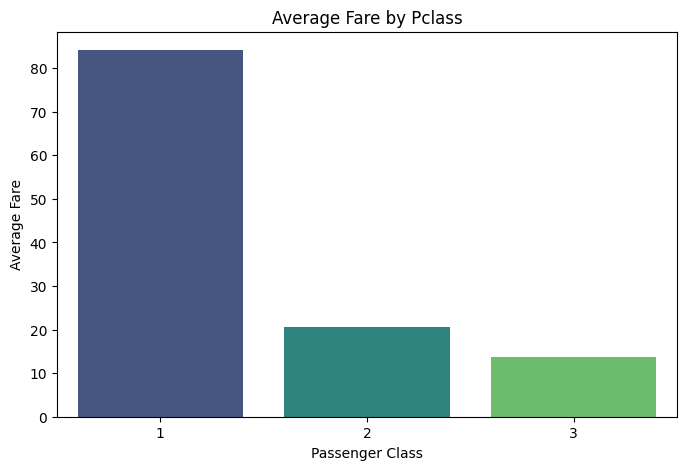

C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3066491812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Fare', data=average_fare_by_sex, palette='magma')


Average Fare by Sex:
       Sex       Fare
0  female  44.479818
1    male  25.523893


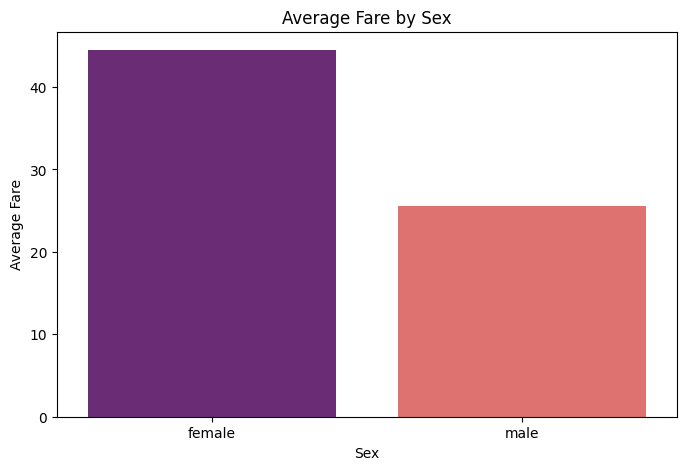

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Find out the average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()
print("Average Fare by Pclass:\n", average_fare_by_pclass)

# 1.1. Plot the average fare by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass, palette='viridis')
plt.title('Average Fare by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

# 2. Find out the average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean().reset_index()
print("Average Fare by Sex:\n", average_fare_by_sex)

# 2.1. Plot the average fare by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Fare', data=average_fare_by_sex, palette='magma')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

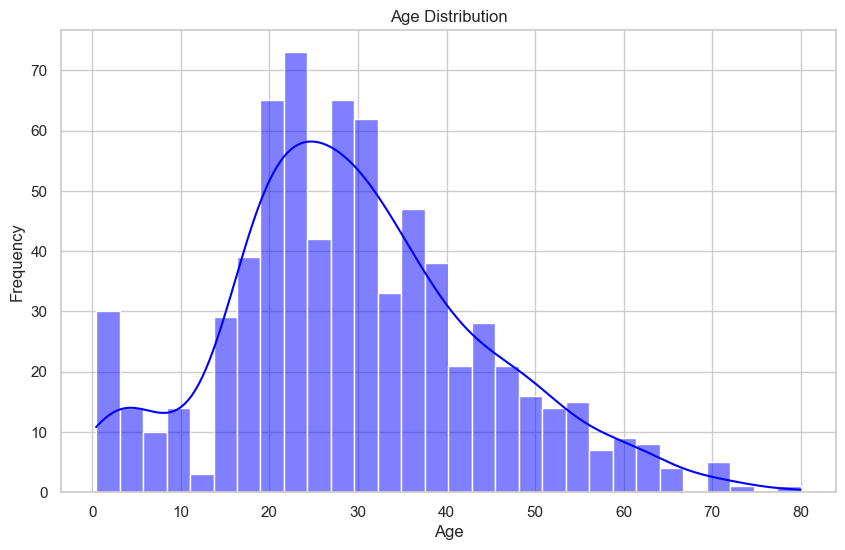

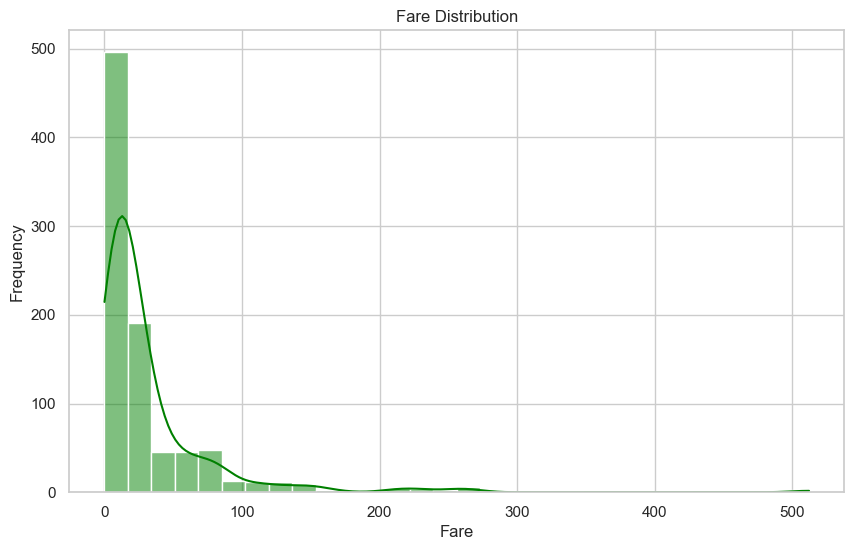

C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3659177250.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='viridis')


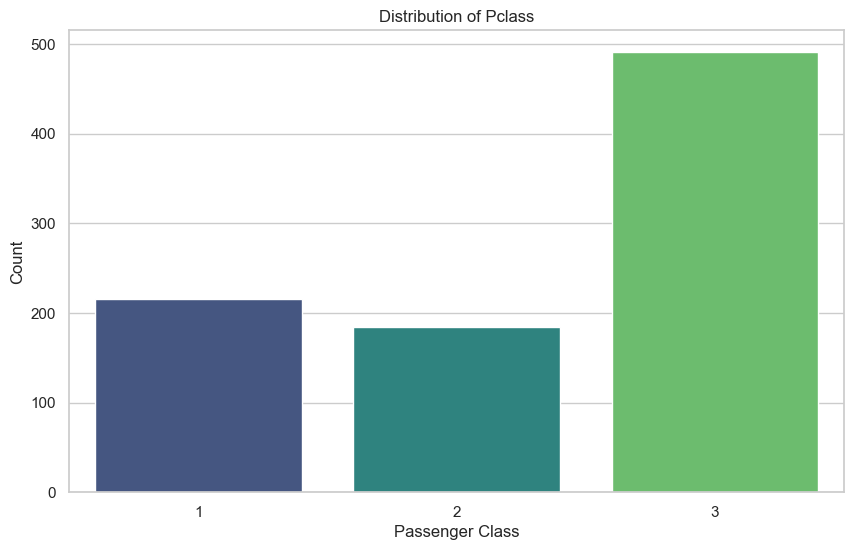

C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3659177250.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='magma')


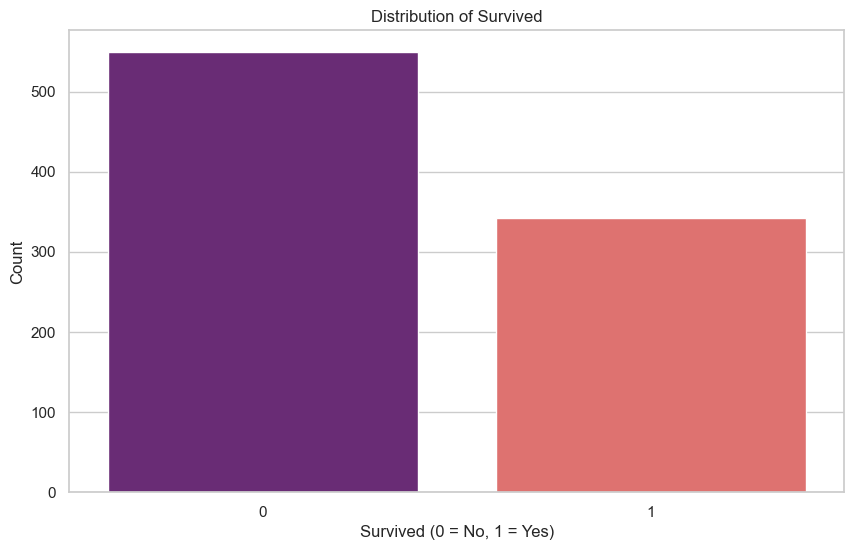

C:\Users\39549\AppData\Local\Temp\ipykernel_17920\3659177250.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='coolwarm')


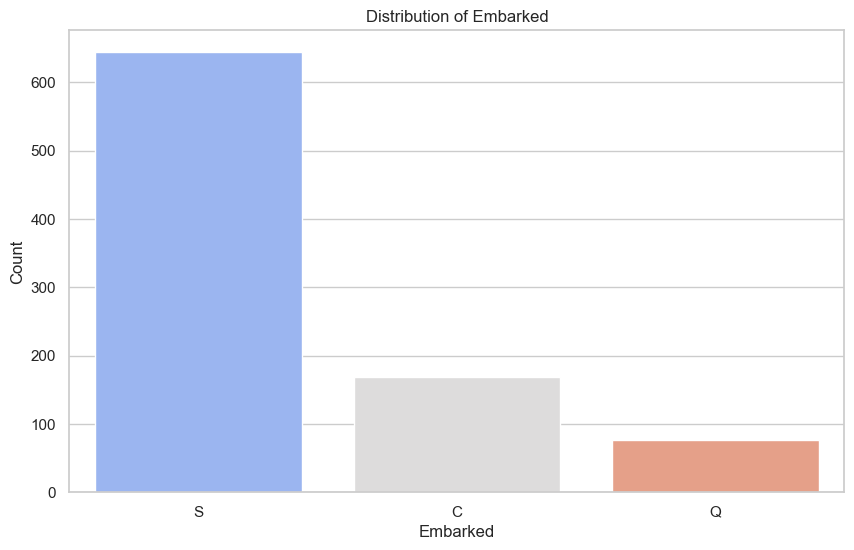

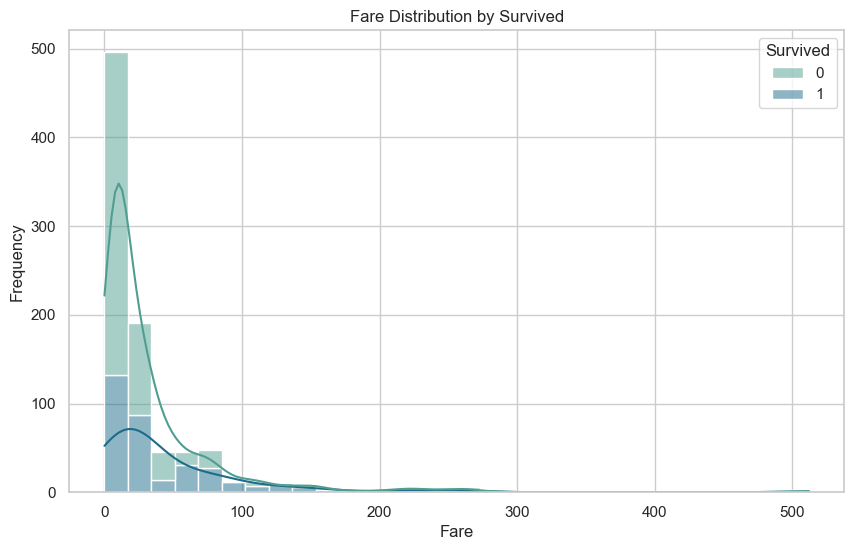

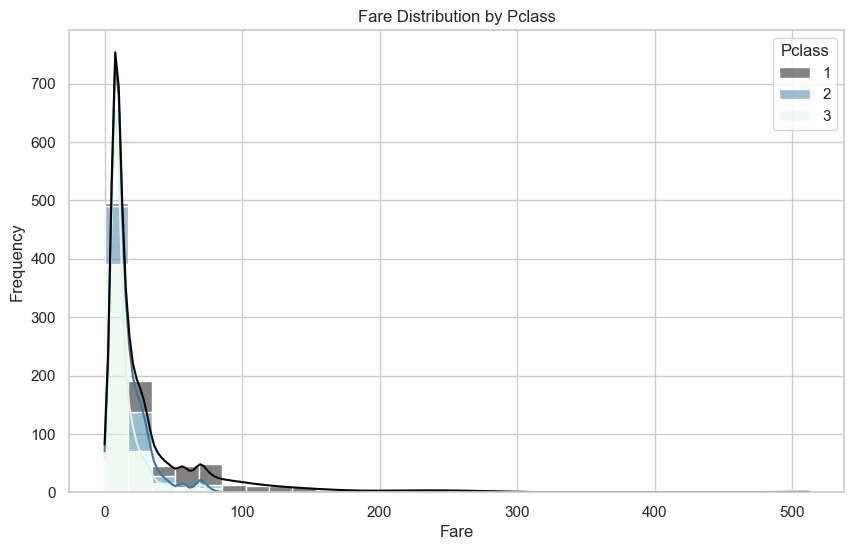

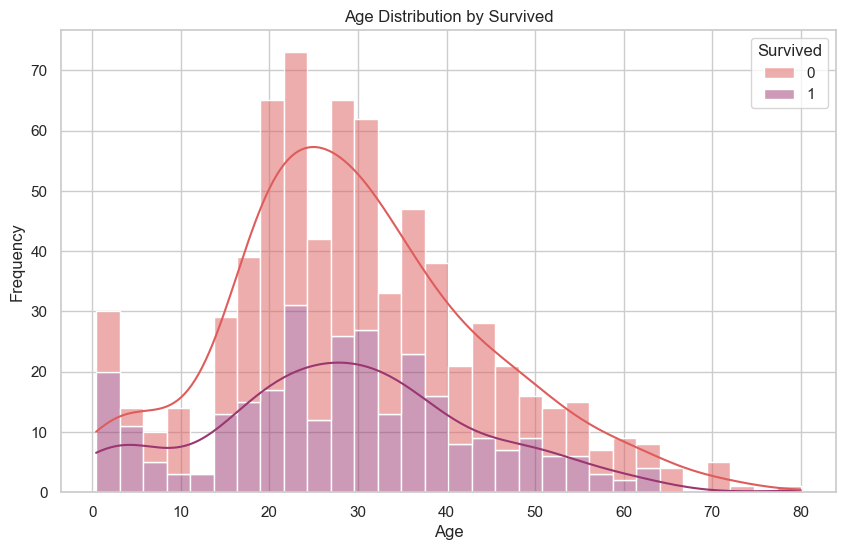

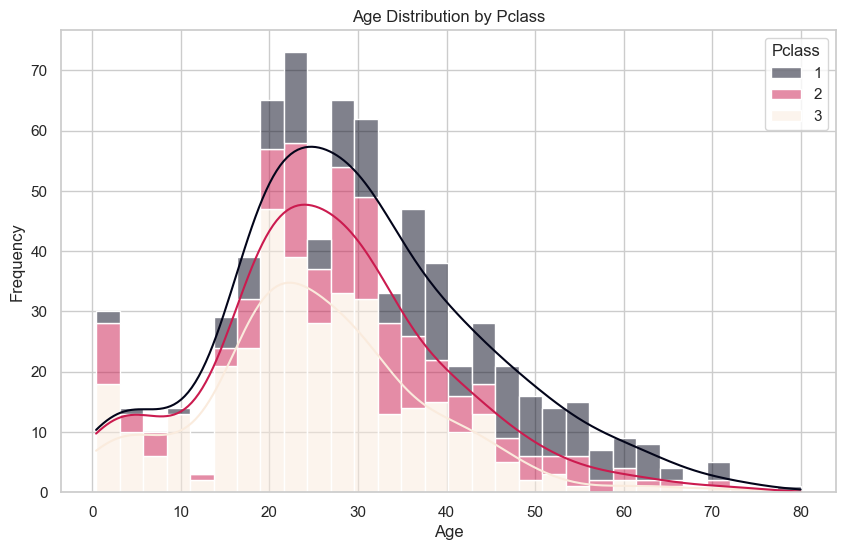

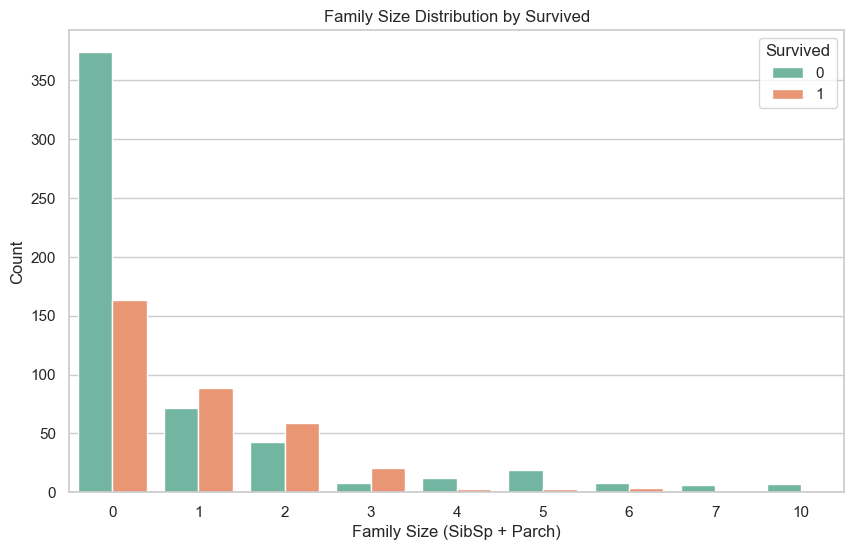

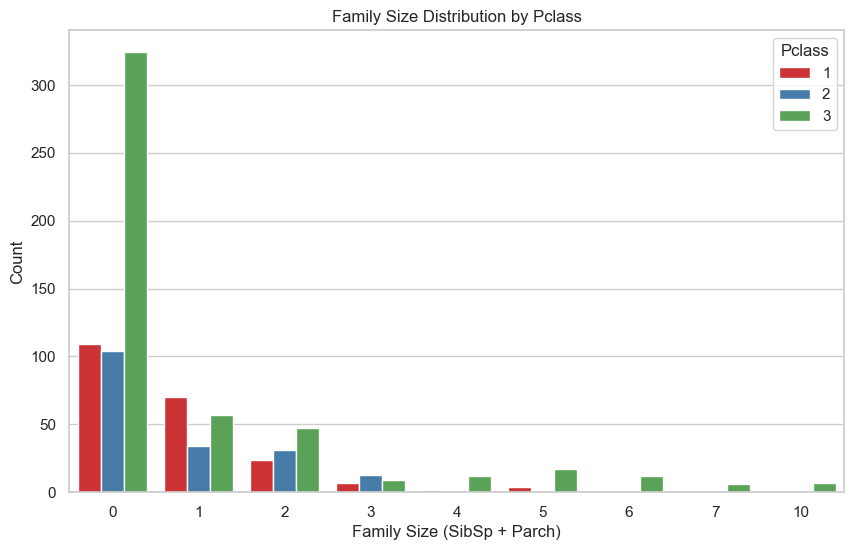

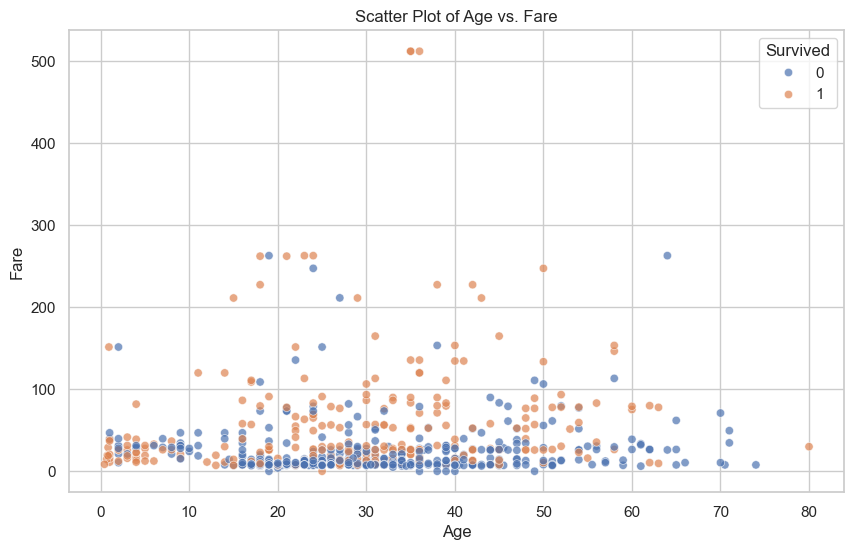

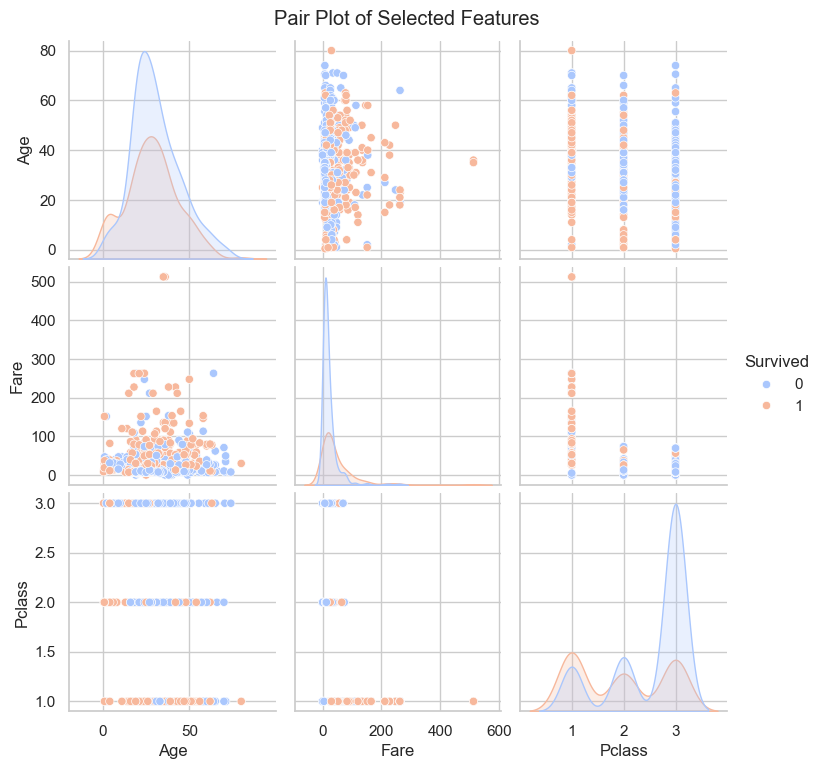

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Set the style of seaborn
sns.set(style='whitegrid')

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Distribution of Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df, palette='magma')
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df, palette='coolwarm')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30, palette='crest', kde=True)
plt.title('Fare Distribution by Survived')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Pclass', multiple='stack', bins=30, palette='mako', kde=True)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, palette='flare', kde=True)
plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', bins=30, palette='rocket', kde=True)
plt.title('Age Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Set2')
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.show()

# 11. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df, palette='Set1')
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', alpha=0.7, palette='deep')
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Explore other possibilities to show relationships
# For example, using pairplot to explore multiple relationships
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


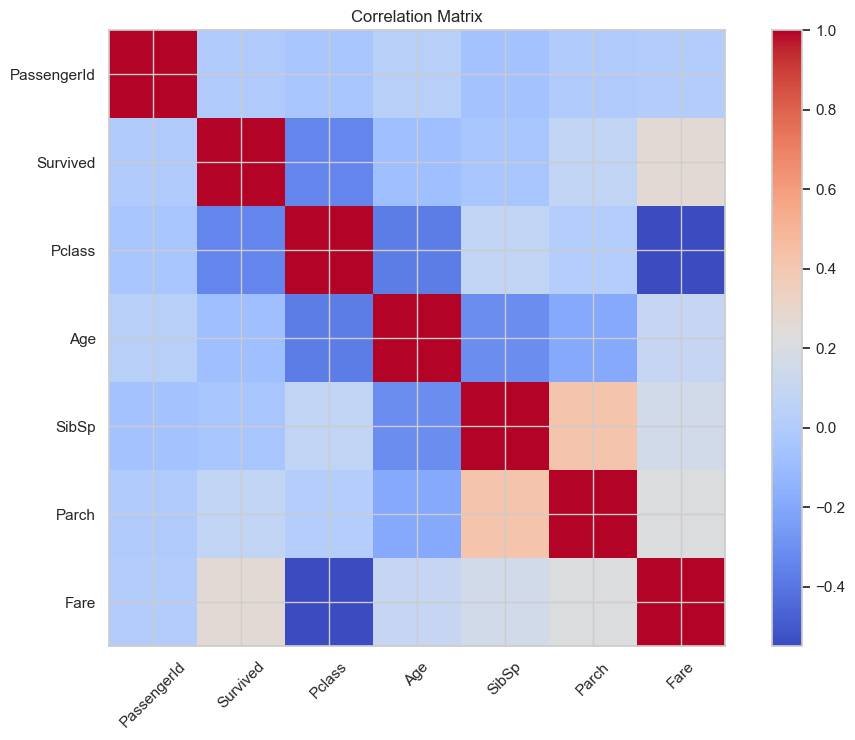

Correlation between Age and Fare: 0.10
Correlation between Survived and Pclass: -0.34
Correlation between SibSp and Parch: 0.41
Correlation between Age and Pclass: -0.37


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Generate a correlation matrix for the entire dataset
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# 2. Find correlation between 'Age' and 'Fare'
if 'Age' in numeric_df.columns and 'Fare' in numeric_df.columns:
    age_fare_correlation = df['Age'].corr(df['Fare'])
    print(f"Correlation between Age and Fare: {age_fare_correlation:.2f}")

# 3. Explore other possible correlations
# Example correlations that can be explored:
if 'Survived' in numeric_df.columns and 'Pclass' in numeric_df.columns:
    survived_pclass_correlation = df['Survived'].corr(df['Pclass'])
    print(f"Correlation between Survived and Pclass: {survived_pclass_correlation:.2f}")

if 'SibSp' in numeric_df.columns and 'Parch' in numeric_df.columns:
    sibsp_parch_correlation = df['SibSp'].corr(df['Parch'])
    print(f"Correlation between SibSp and Parch: {sibsp_parch_correlation:.2f}")

if 'Age' in numeric_df.columns and 'Pclass' in numeric_df.columns:
    age_pclass_correlation = df['Age'].corr(df['Pclass'])
    print(f"Correlation between Age and Pclass: {age_pclass_correlation:.2f}")
